# Data Augmentation To Address Overfitting In Flower Classification CNN

In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

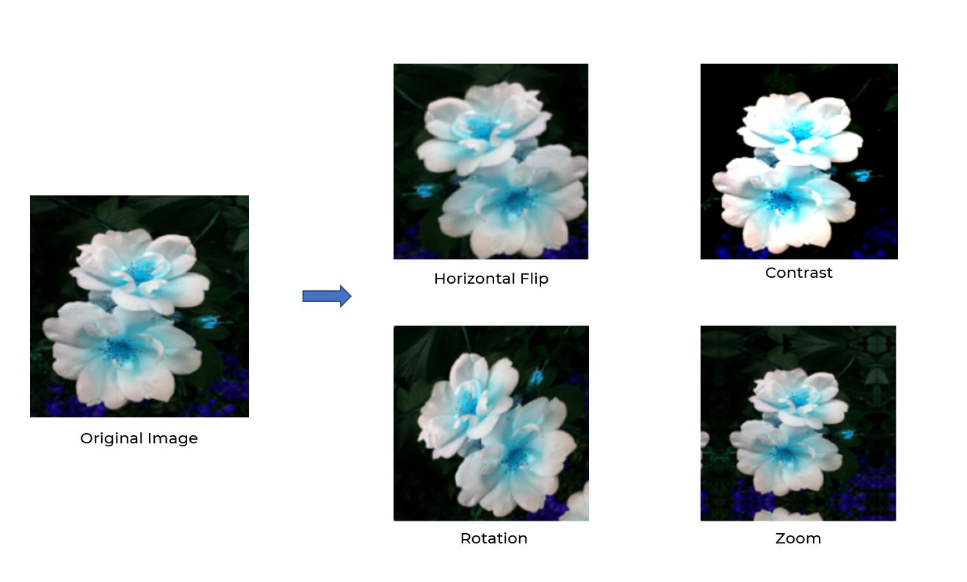

# Question

How to download dataset using tgz

How to get downloaded file in your location

what is the use of pathlib

How to  search for files matching a specific pattern using glob

list out use of glob command

creates a dictionary where the keys are flower categories and values are lists of image paths for each category

How to create dictionary where the keys are category and values are element in eacg category in python and django

Accessing the First 5 Image Paths for Roses from dictionary

reads an image from a file and stores it as a NumPy array, which can then be processed or displayed.convert inti 3D

write function resizes this NumPy array to the specified dimensions

How to convert raw scores into probabilty distribution using softmax

http://localhost:8888/notebooks/data_augementation_property.ipynb

why we use decoding image (see in http://localhost:8888/notebooks/data_augementation_property.ipynb)

why we use expands_dims (see in http://localhost:8888/notebooks/data_augementation_property.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

Load flowers dataset

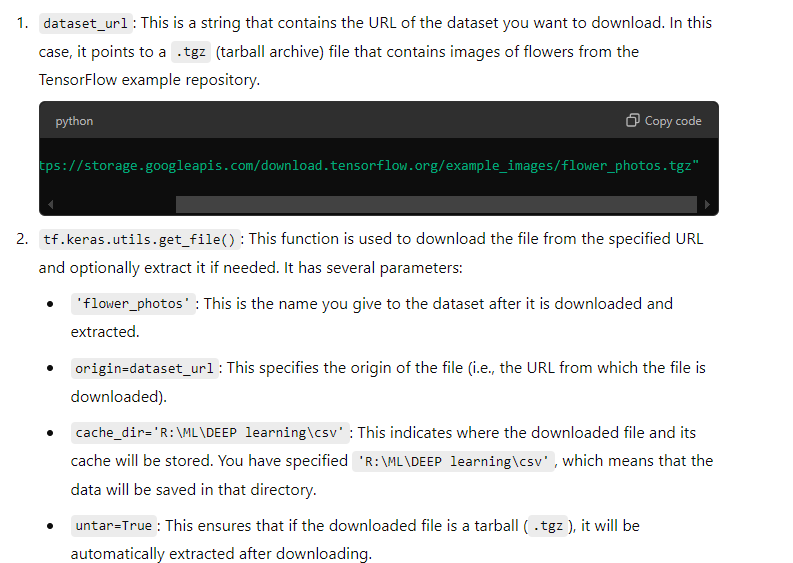

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='R:\ML\DEEP learning\csv', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 128s 1us/step


In [3]:
data_dir

'R:\\ML\\DEEP learning\\csv\\datasets\\flower_photos'

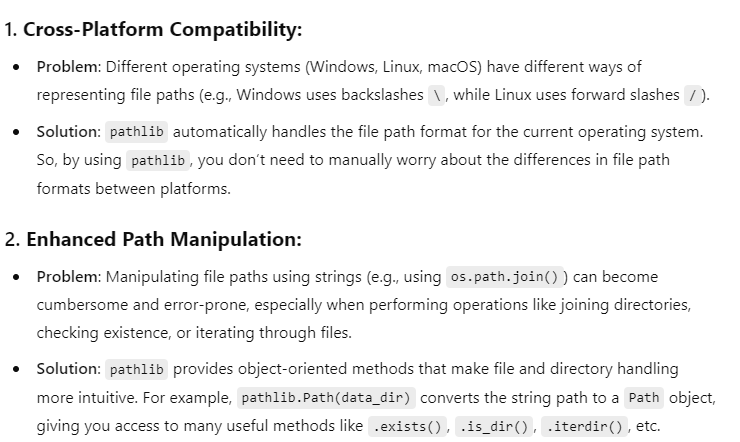

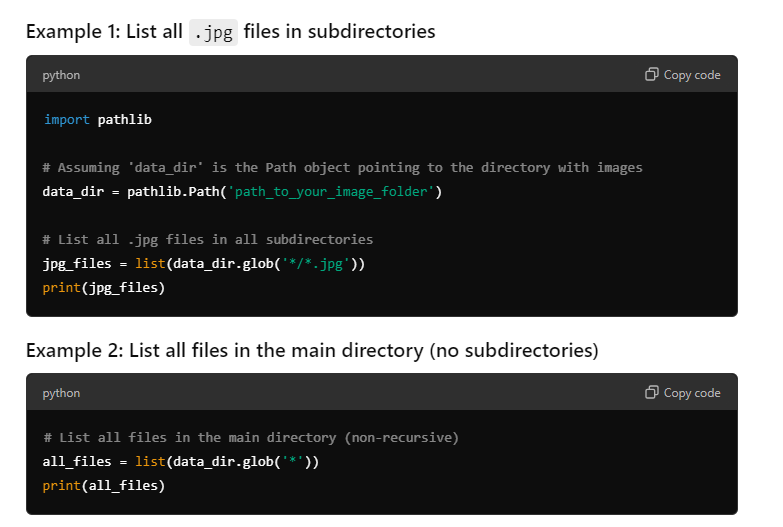

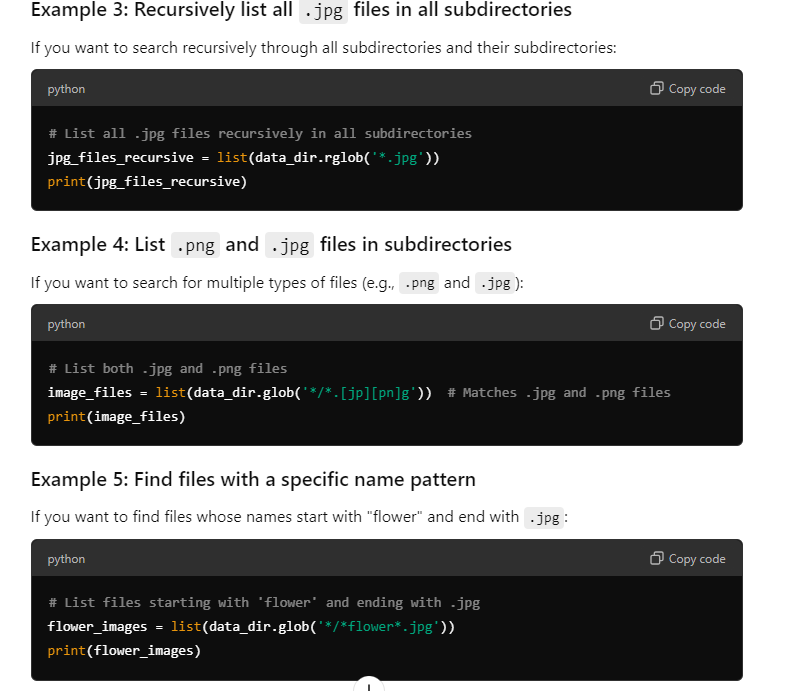

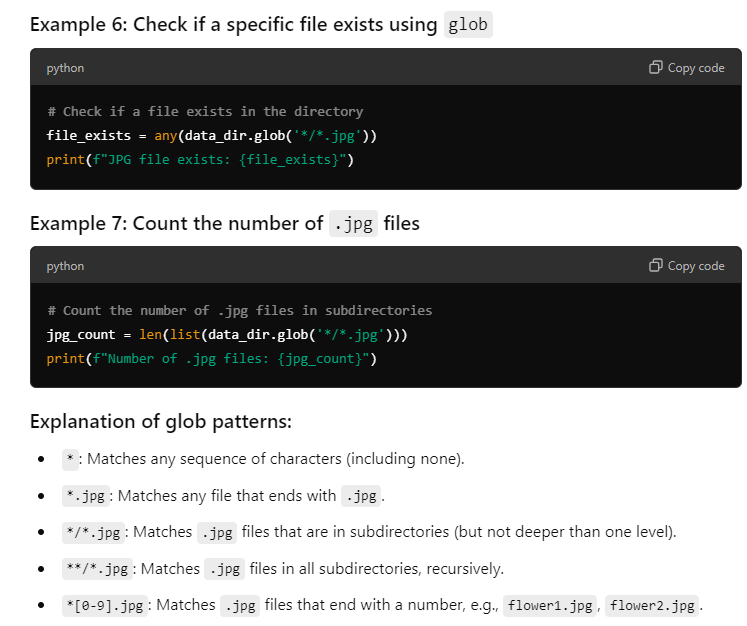

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('R:/ML/DEE

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

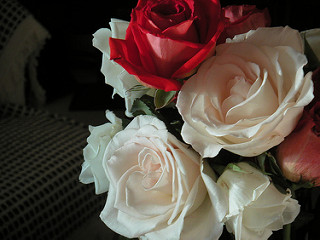

In [9]:
PIL.Image.open(str(roses[1]))

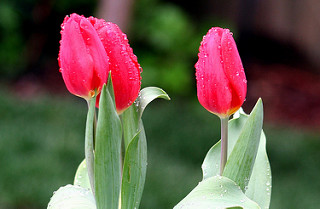

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv

# How to create dictionary in python and django

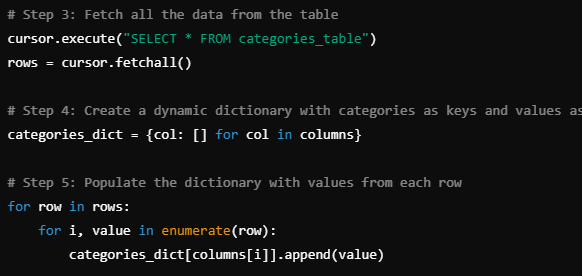

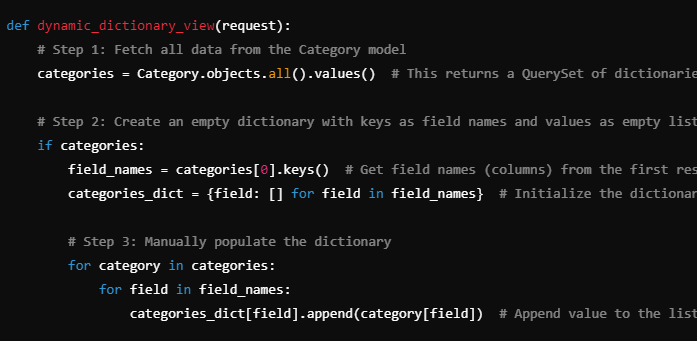

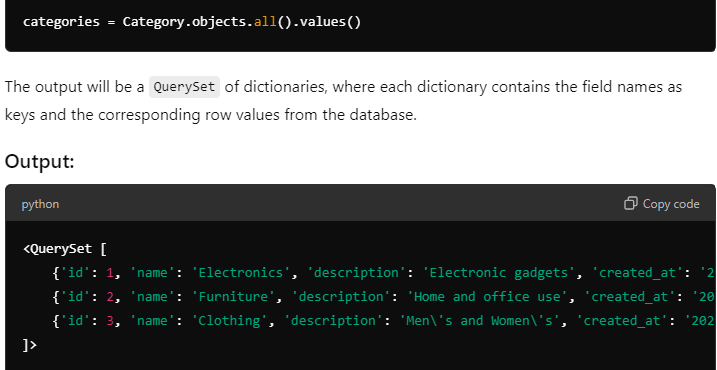

In [11]:
# creates a dictionary where the keys are flower categories and values are lists of image paths for each category
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
#Accessing the First 5 Image Paths for Roses from dictionary
flowers_images_dict['roses'][:5]

[WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [16]:
flowers_images_dict['roses'][0]

WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [14]:
#Converting Path Object to String to read using csv
str(flowers_images_dict['roses'][0])

'R:\\ML\\DEEP learning\\csv\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
#This function reads an image from a file and stores it as a NumPy array, which can then be processed or displayed.convert inti 3D data
#Purpose: This uses OpenCV's imread() function to read the image from the file path. The path is converted to a string using
#str(), and OpenCV loads the image into the img variable.
cv2.imread(): This function reads an image from a file and stores it as a NumPy array, which can then be processed or displayed.
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
img.shape

(240, 179, 3)

In [19]:
#function resizes this NumPy array to the specified dimensions
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [23]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(images)
 

roses
[WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('R:/ML/DEEP learning/csv/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('R:/ML/DEEP

In [41]:
# get x and y in where x is in image is represented as a NumPy array of size 180x180 pixels. This list will be used as input data for the machine learning model.
# and y is  list of numeric labels corresponding to the categories of the flowers
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

# Train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it 

In [28]:
#dense layer alwasys use 1 d im so we need to flatten this
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.3255 - loss: 1.5547
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.5866 - loss: 1.0549
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.6796 - loss: 0.8467
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.7625 - loss: 0.6520
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.8425 - loss: 0.4520
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.9177 - loss: 0.2824
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.9484 - loss: 0.1622
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9605 - loss: 0.1304
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.9623 - loss: 0.1073
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9918 - loss: 0.0447
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.9937 - loss: 0.0302
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6237 - loss: 2.1095


[2.2792270183563232, 0.6209150552749634]

# Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


array([[  2.9609773 ,  23.574232  ,   3.6283226 , -16.461412  ,
         -2.9096797 ],
       [ 13.377856  ,   2.498014  , -11.798864  ,   1.9845686 ,
          6.322362  ],
       [  1.2251918 ,   1.6253244 ,  12.141667  ,  -5.3026648 ,
         -1.0683858 ],
       ...,
       [  1.7610565 , -10.564502  ,  -5.823563  ,  11.849658  ,
          8.255987  ],
       [  7.8934264 ,  -1.2726287 ,   1.8555888 ,  -4.317046  ,
         -5.5880055 ],
       [  3.3339624 , -13.199471  ,  -0.17130518,  10.730117  ,
          8.944402  ]], dtype=float32)

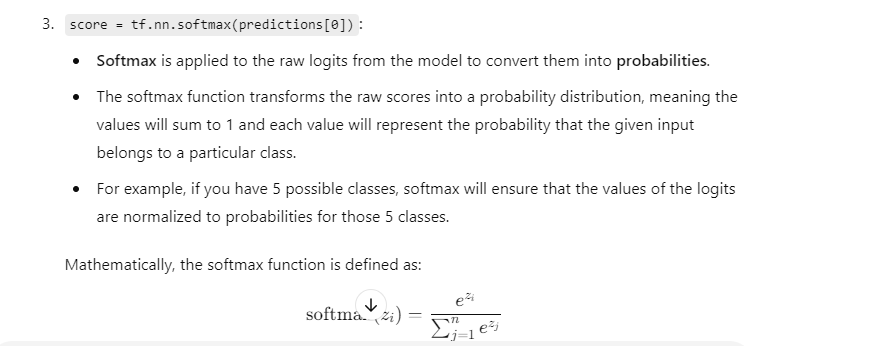

In [43]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1162906e-09, 1.0000000e+00, 2.1757127e-09, 4.0995907e-18,
       3.1490776e-12], dtype=float32)>

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation

In [44]:
from tensorflow.keras import layers
from tensorflow import keras

# Define the image dimensions (you can adjust these values based on your dataset)
img_height = 180  # Example: height of the image
img_width = 180   # Example: width of the image

# Data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)
data_augmentation

<Sequential name=sequential_3, built=True>

In [ ]:
data_augmentation1 = tf.keras.Sequential([
    layers.RandomFlip("horizontal")
])

# Example usage
augmented_image = data_augmentation1(image)

# Original Image

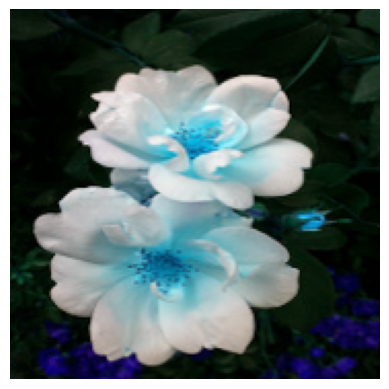

In [38]:
plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation

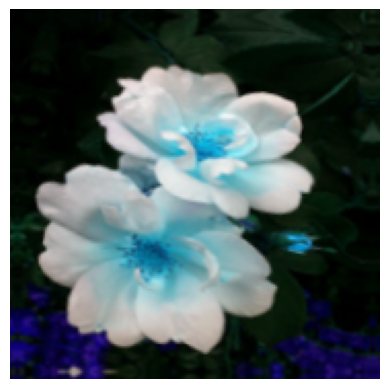

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

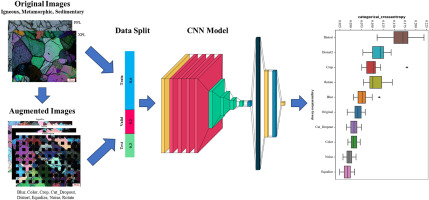

In [40]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - accuracy: 0.3243 - loss: 1.6550
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.5763 - loss: 1.0696
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.6159 - loss: 0.9652
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.6415 - loss: 0.9001
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.6751 - loss: 0.8120
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.6797 - loss: 0.8138
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.6919 - loss: 0.7844
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.7360 - loss: 0.7039
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7395 - loss: 0.6757
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.7514 - loss: 0.6368
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7655 - loss: 0.6128
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7361 - loss: 0.9037


[0.9364566206932068, 0.741830050945282]